# Project Description

Suppose Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

In this datasets Predict whether the customer has taken the subscription or not

# Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In this datasets Predict whether the customer has taken the subscription or not

In [3]:
# Here the top 10 data in these datasets
df.head(10)

ID  age          job   marital  education default  balance housing loan  \
0  26110   56       admin.   married    unknown      no     1933      no   no   
1  40576   31      unknown   married  secondary      no        3      no   no   
2  15320   27     services   married  secondary      no      891     yes   no   
3  43962   57   management  divorced   tertiary      no     3287      no   no   
4  29842   31   technician   married  secondary      no      119     yes   no   
5  29390   33   management    single   tertiary      no        0     yes   no   
6  40444   56      retired   married  secondary      no     1044      no   no   
7  40194   50   technician    single  secondary      no     1811      no   no   
8  29824   45  blue-collar  divorced  secondary      no     1951     yes   no   
9  44676   35       admin.   married  secondary      no     1204      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   
5   cellular    2   feb       116         3     -1         0  unknown   
6  telephone    3   jul       353         2     -1         0  unknown   
7   cellular    8   jun        97         4     -1         0  unknown   
8   cellular    4   feb       692         1     -1         0  unknown   
9   cellular    3   sep       789         2     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no  
5         no  
6        yes  
7         no  
8         no  
9         no

In [4]:
# Here the last 10 data in these datasets
df.tail(10)

ID  age          job   marital  education default  balance housing  \
31637  20110   44   technician   married  secondary      no     5163      no   
31638  16309   29  blue-collar   married  secondary      no      721     yes   
31639    279   38     services    single  secondary      no      570     yes   
31640  12109   43   management    single  secondary      no     2968      no   
31641   9476   37   technician    single   tertiary      no     1309      no   
31642  36483   29   management    single   tertiary      no        0     yes   
31643  40178   53   management  divorced   tertiary      no      380      no   
31644  19710   32   management    single   tertiary      no      312      no   
31645  38556   57   technician   married  secondary      no      225     yes   
31646  14156   55   management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31637   no   cellular   11   aug        48         2     -1         0   
31638   no   cellular   23   jul       644         1     -1         0   
31639   no    unknown    5   may        75         2     -1         0   
31640   no    unknown   20   jun        30         4     -1         0   
31641   no    unknown    6   jun       442         2     -1         0   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31637  unknown         no  
31638  unknown         no  
31639  unknown         no  
31640  unknown         no  
31641  unknown         no  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [5]:
# Here we can see that the columns
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
df.shape

(31647, 18)

Here we can see that in these datsets contains 31647 rows and 18 columns

In [7]:
print("The Dimensions of Datasets: ",df.shape)
print("The columns of the datasets: ",df.columns)

The Dimensions of Datasets:  (31647, 18)
The columns of the datasets:  Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [8]:
df.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [9]:
# Now we cheking the null values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

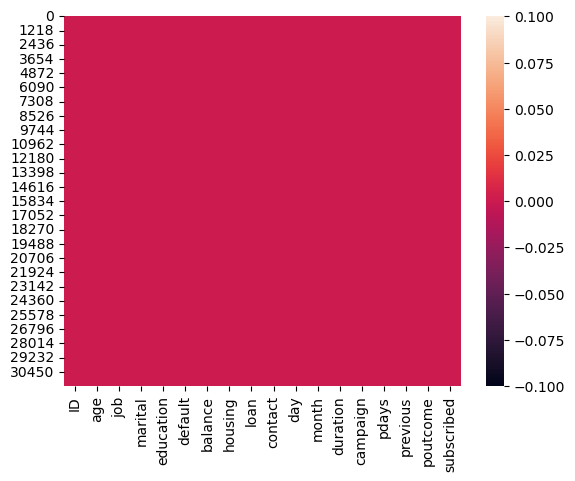

In [10]:
# Now check null values using heatmap
sns.heatmap(df.isnull())

In [11]:
# Now checking the datatypes
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [12]:
# Now separating categorical columns and numercial columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Categorical_col : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numercial_col : ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [13]:
# Now we checking the number of uniques values
df.nunique().to_frame("No. of uniques values")

No. of uniques values
ID                          31647
age                            76
job                            12
marital                         3
education                       4
default                         2
balance                      6326
housing                         2
loan                            2
contact                         3
day                            31
month                          12
duration                     1454
campaign                       45
pdays                         509
previous                       38
poutcome                        4
subscribed                      2

In [14]:
df["job"].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [15]:
df["marital"].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [16]:
df["education"].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [17]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [18]:
df["housing"].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df["loan"].unique()

array(['no', 'yes'], dtype=object)

In [20]:
df["contact"].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [21]:
df["poutcome"].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [22]:
df["subscribed"].unique()

array(['no', 'yes'], dtype=object)

# Data Visualization

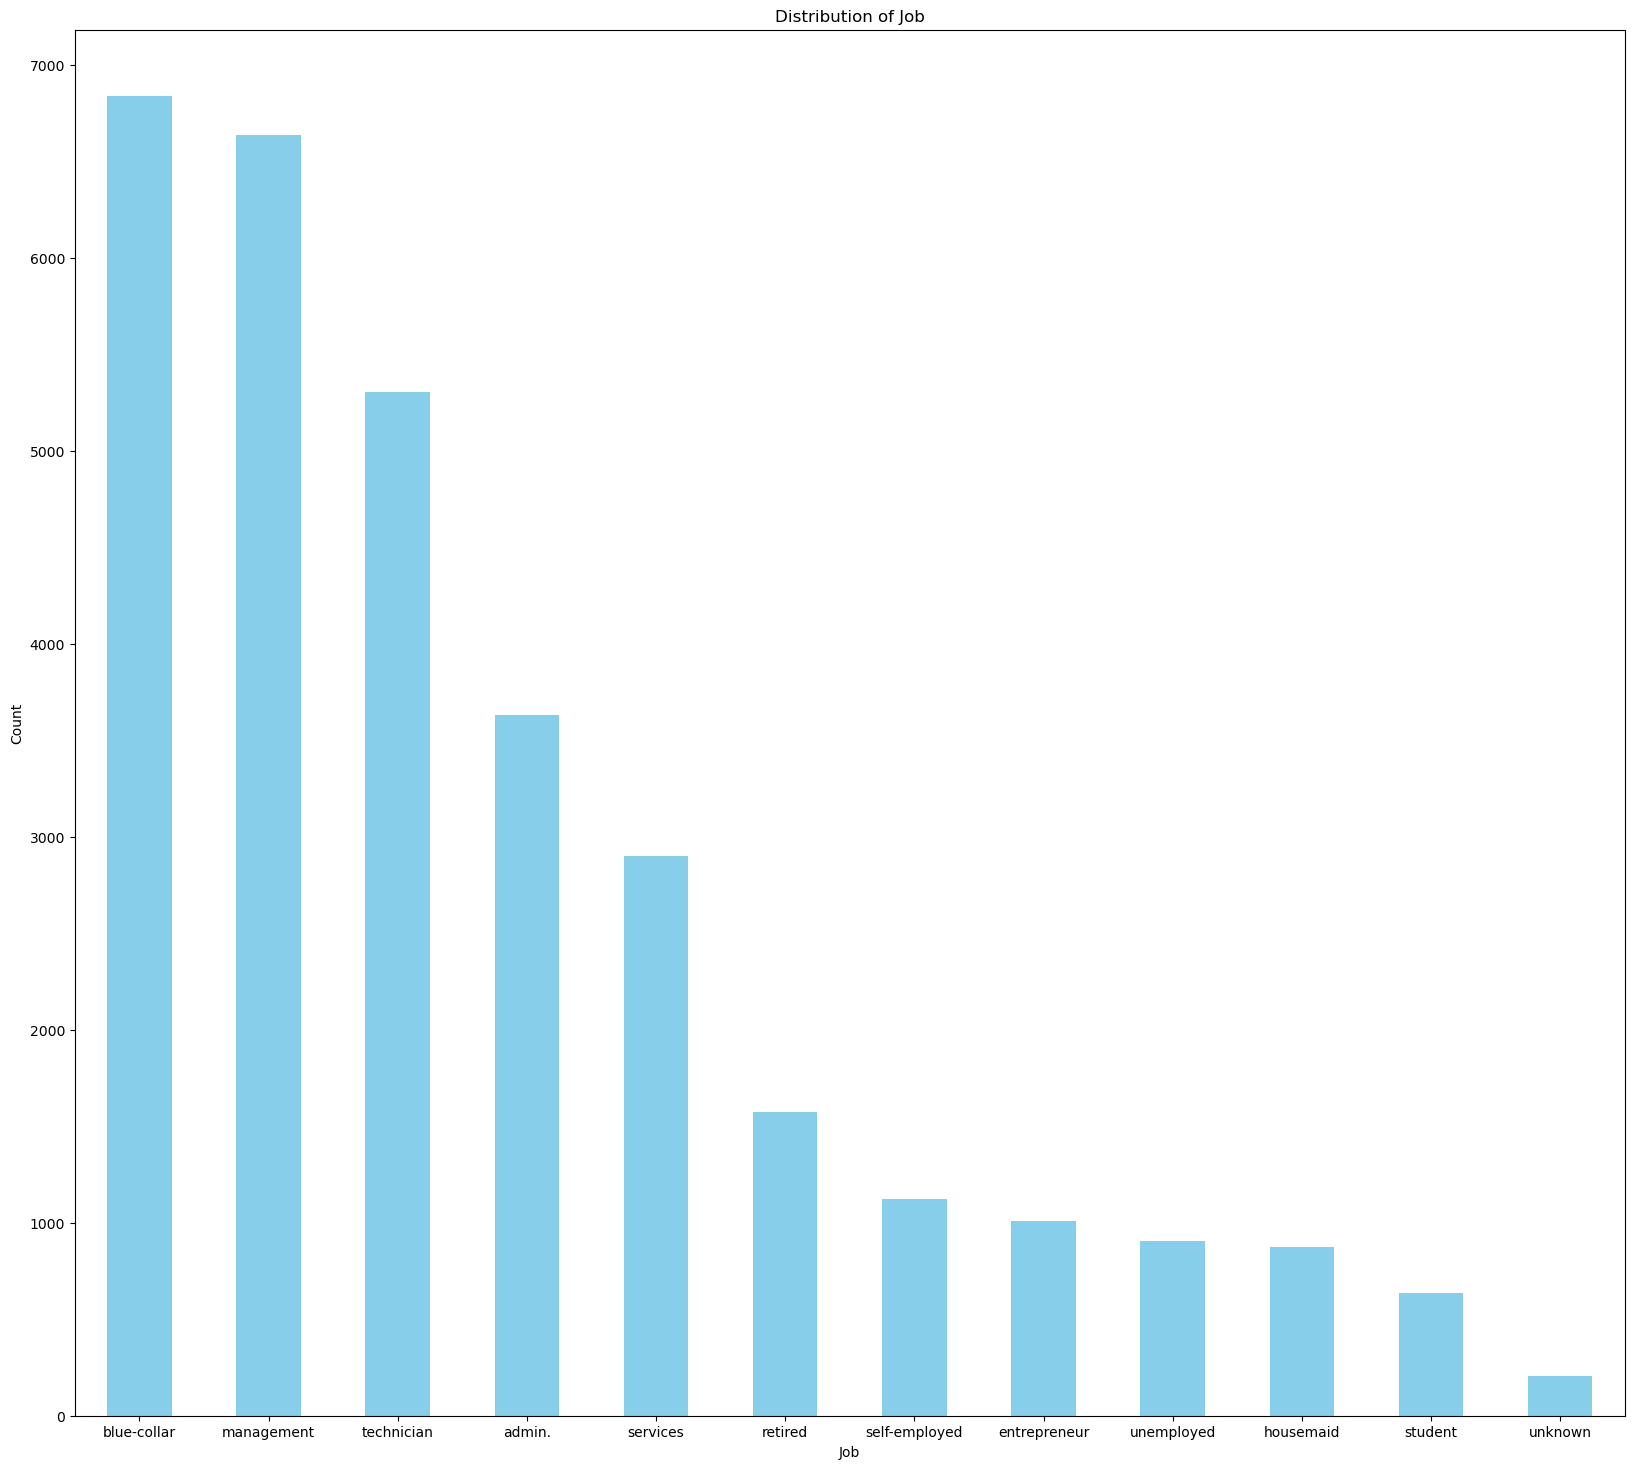

In [23]:
# Assuming df is your DataFrame and it has a column named 'job'
job_counts = df["job"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of Job")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

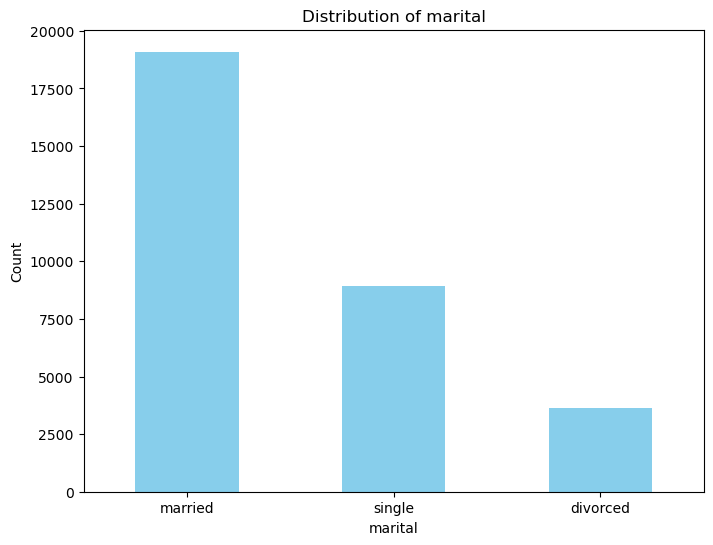

In [24]:
# Assuming df is your DataFrame and it has a column named 'marital'
job_counts = df["marital"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of marital")
plt.xlabel("marital")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

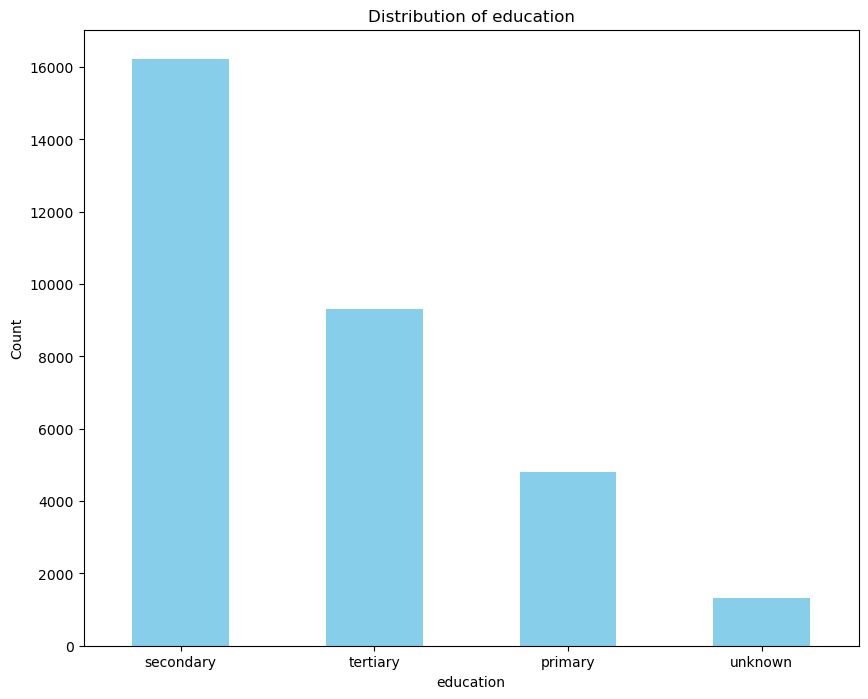

In [25]:
# Assuming df is your DataFrame and it has a column named 'education'
job_counts = df["education"].value_counts()

plt.figure(figsize=(10,8))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of education")
plt.xlabel("education")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

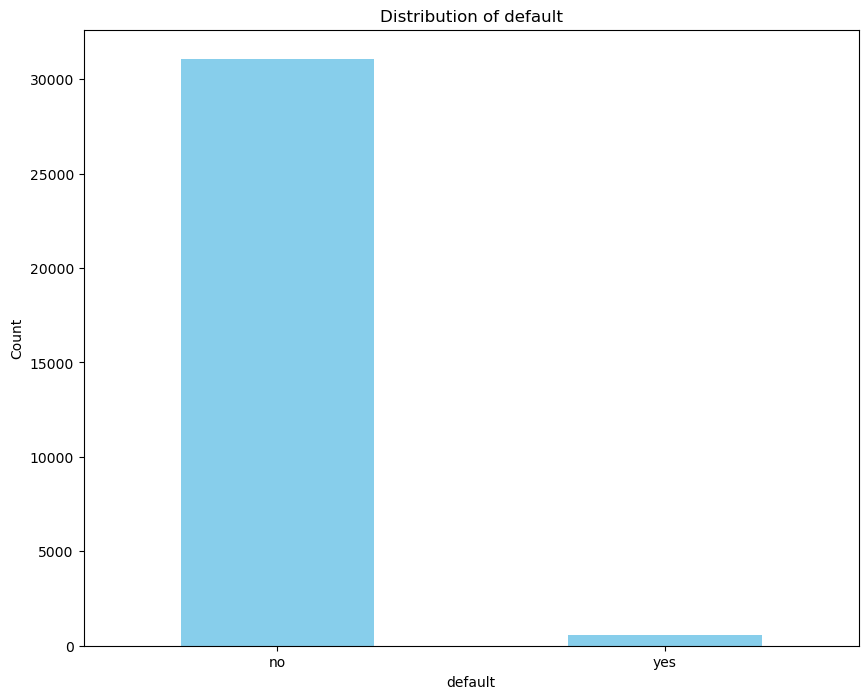

In [26]:
# Assuming df is your DataFrame and it has a column named 'default'
job_counts = df["default"].value_counts()

plt.figure(figsize=(10,8))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of default")
plt.xlabel("default")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

yes    17584
no     14063
Name: housing, dtype: int64


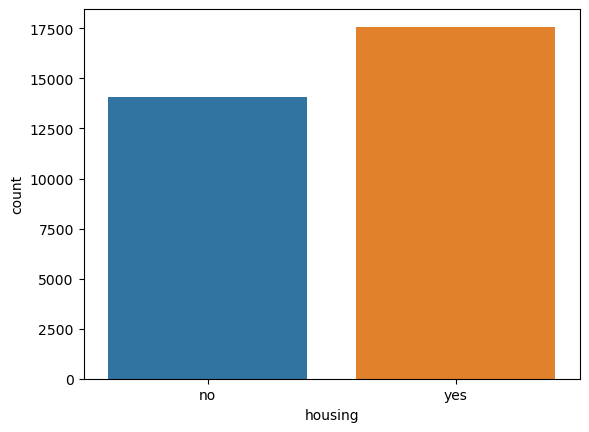

In [27]:
# Visualize the data using countplot
ax=sns.countplot(x="housing",data=df)
print(df["housing"].value_counts())

no     26516
yes     5131
Name: loan, dtype: int64


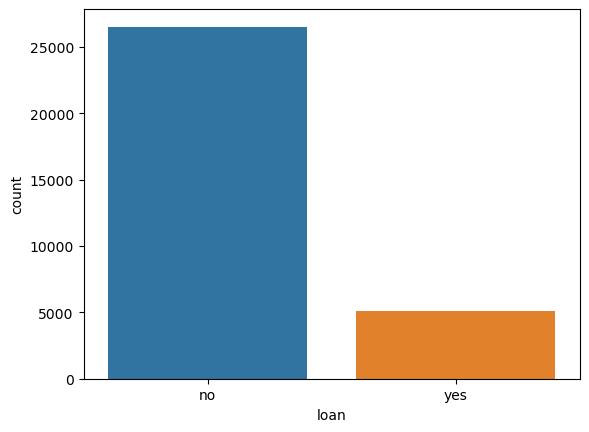

In [28]:
# Visualize the data using countplot
ax=sns.countplot(x="loan",data=df)
print(df["loan"].value_counts())

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


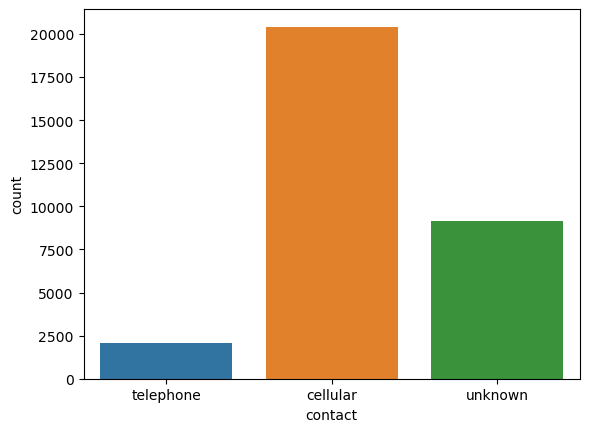

In [29]:
# Visualize the data using countplot
ax=sns.countplot(x="contact",data=df)
print(df["contact"].value_counts())

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


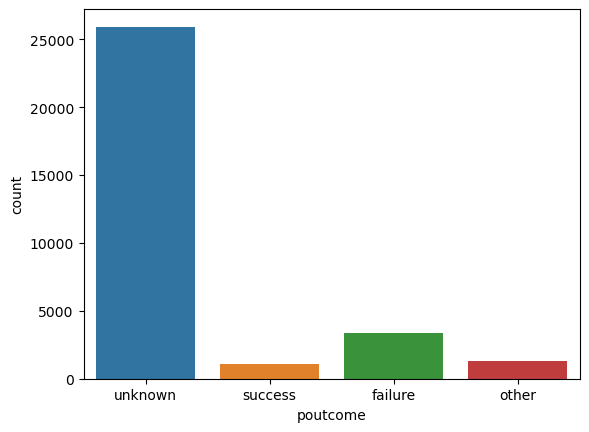

In [30]:
# Visualize the data using countplot
ax=sns.countplot(x="poutcome",data=df)
print(df["poutcome"].value_counts())

no     27932
yes     3715
Name: subscribed, dtype: int64


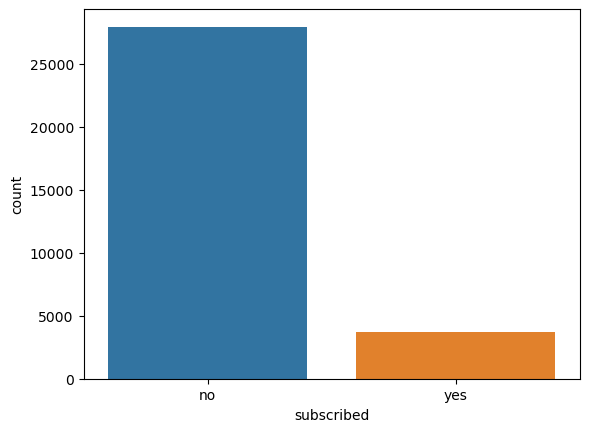

In [31]:
# Visualize the data using countplot
ax=sns.countplot(x="subscribed",data=df)
print(df["subscribed"].value_counts())

# Relational Analysis

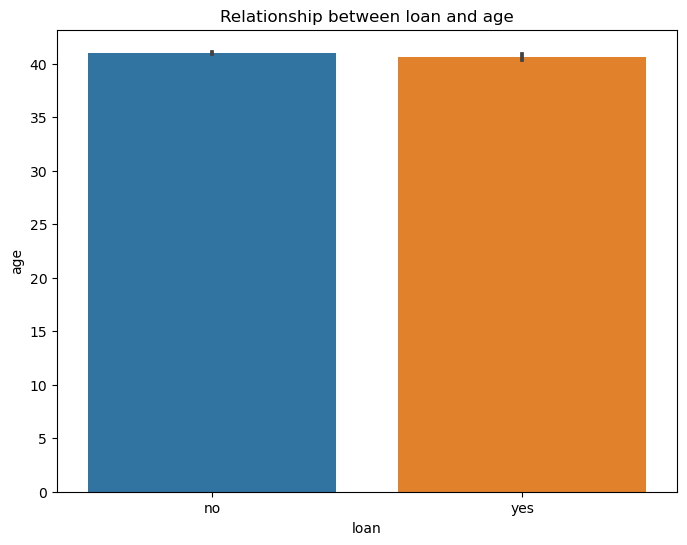

In [32]:
# loan columns and age
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="loan", y="age", data=df)

# Set labels and title
plt.xlabel("loan")
plt.ylabel("age")
plt.title("Relationship between loan and age")

# Show the plot
plt.show()

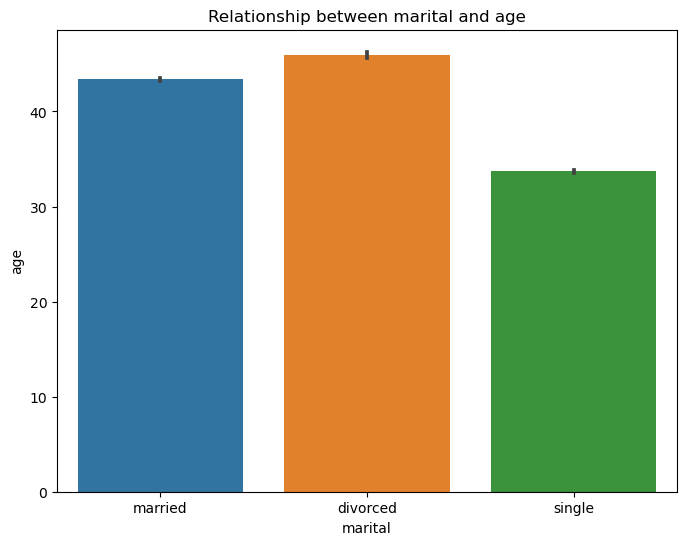

In [33]:
# marital columns and age
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="marital", y="age", data=df)

# Set labels and title
plt.xlabel("marital")
plt.ylabel("age")
plt.title("Relationship between marital and age")

# Show the plot
plt.show()

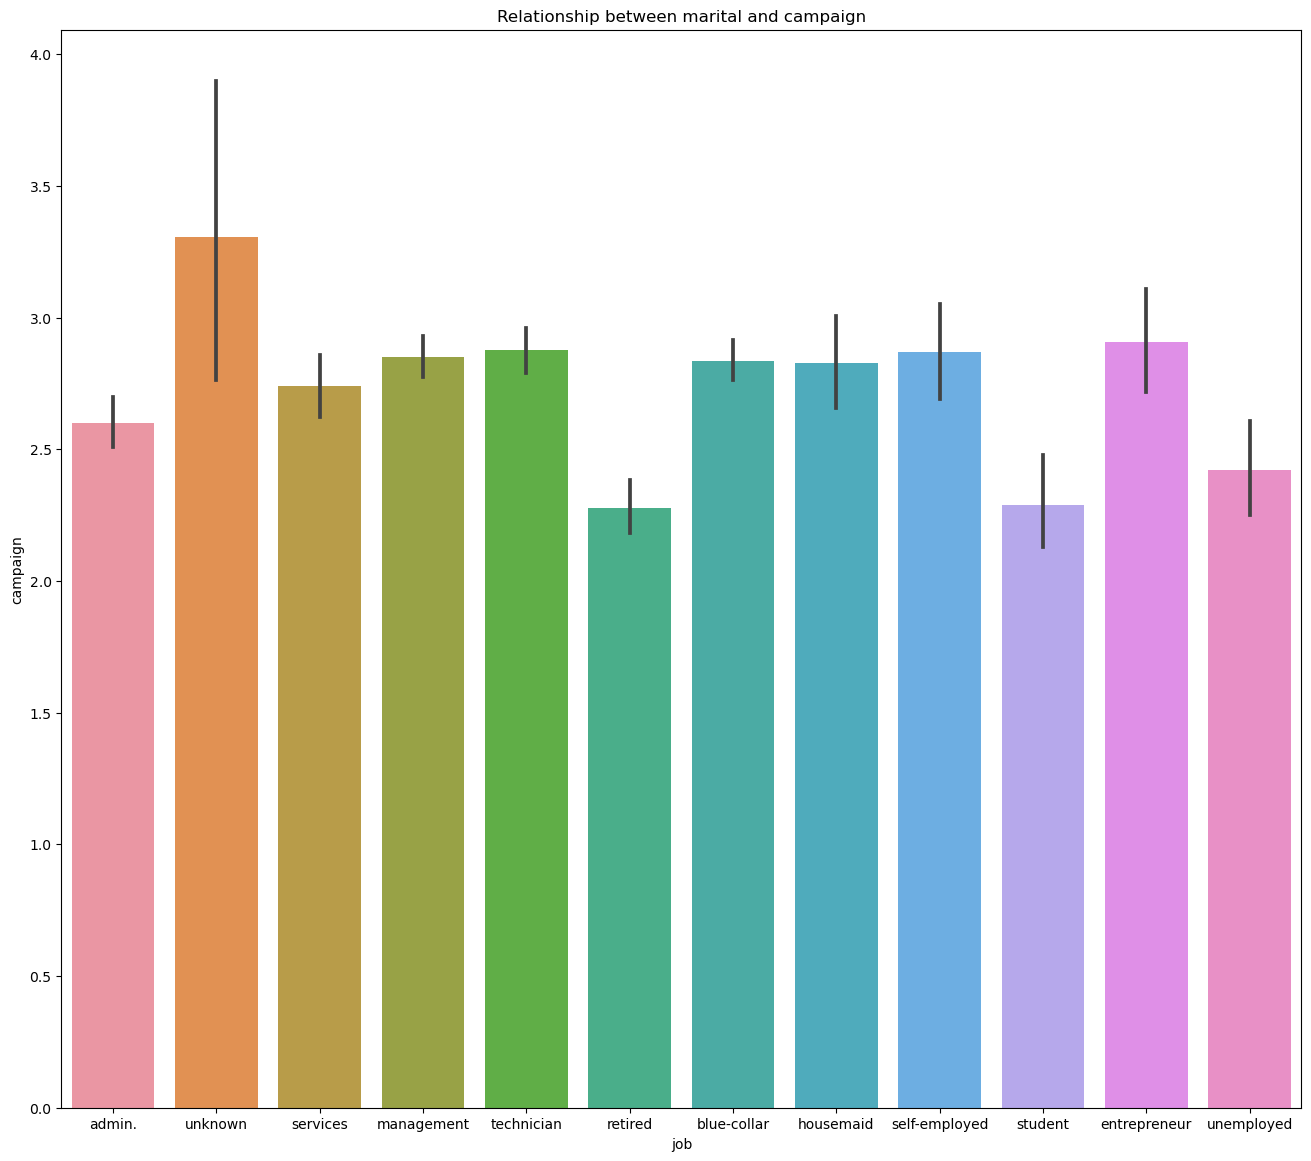

In [34]:
# job columns and campaign
plt.figure(figsize=(16,14))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="job", y="campaign", data=df)

# Set labels and title
plt.xlabel("job")
plt.ylabel("campaign")
plt.title("Relationship between marital and campaign")

# Show the plot
plt.show()

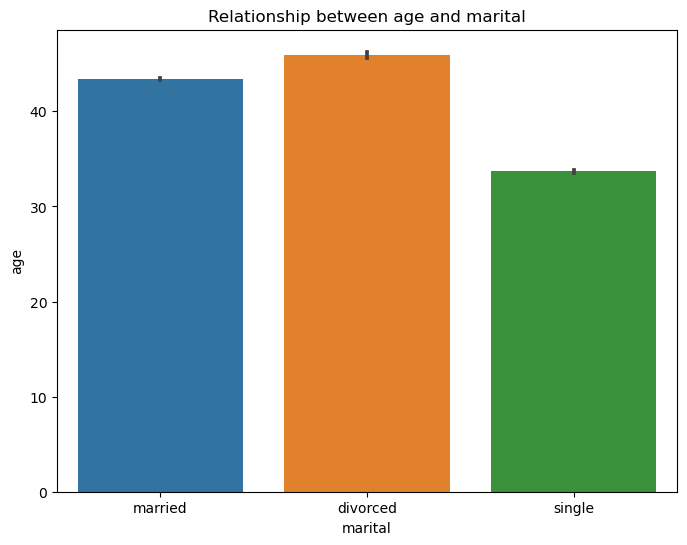

In [35]:
# age columns and marital
plt.figure(figsize=(8,6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="marital", y="age", data=df)

# Set labels and title
plt.xlabel("marital")
plt.ylabel("age")
plt.title("Relationship between age and marital")

# Show the plot
plt.show()

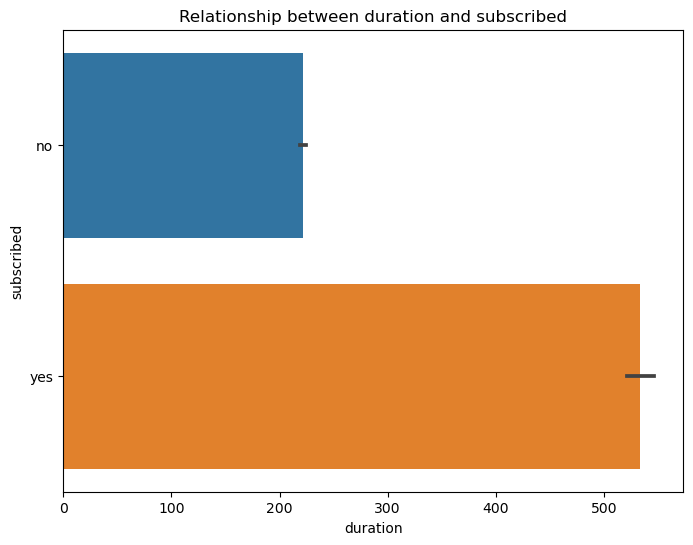

In [36]:
# duration columns and subscribed
plt.figure(figsize=(8,6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="duration", y="subscribed", data=df)

# Set labels and title
plt.xlabel("duration")
plt.ylabel("subscribed")
plt.title("Relationship between duration and subscribed")

# Show the plot
plt.show()

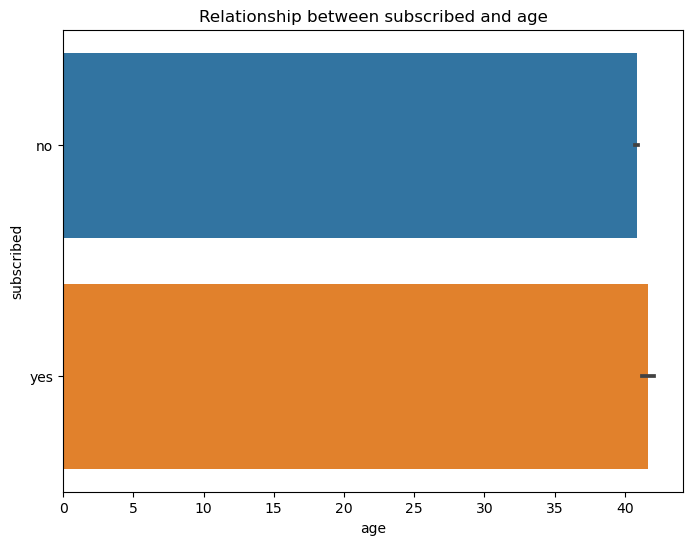

In [37]:
# age columns and subscribed
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="age", y="subscribed", data=df)

# Set labels and title
plt.xlabel("age")
plt.ylabel("subscribed")
plt.title("Relationship between subscribed and age")

# Show the plot
plt.show()

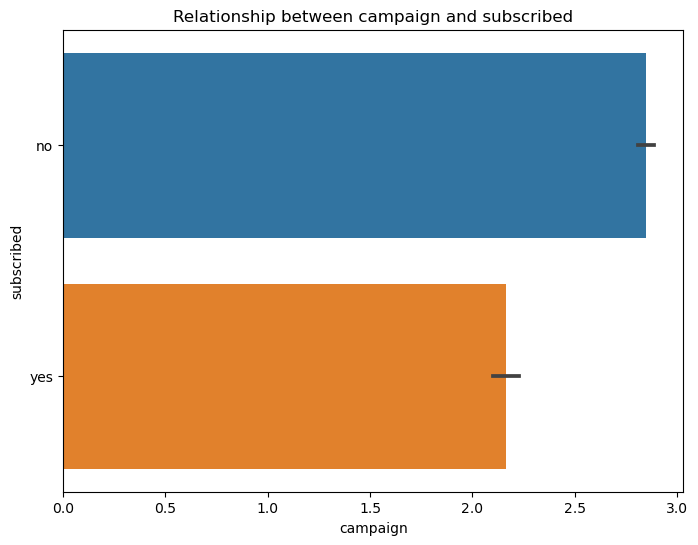

In [38]:
# campaign columns and subscribed
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="campaign", y="subscribed", data=df)

# Set labels and title
plt.xlabel("campaign")
plt.ylabel("subscribed")
plt.title("Relationship between campaign and subscribed")

# Show the plot
plt.show()

# Multivariate Analysis

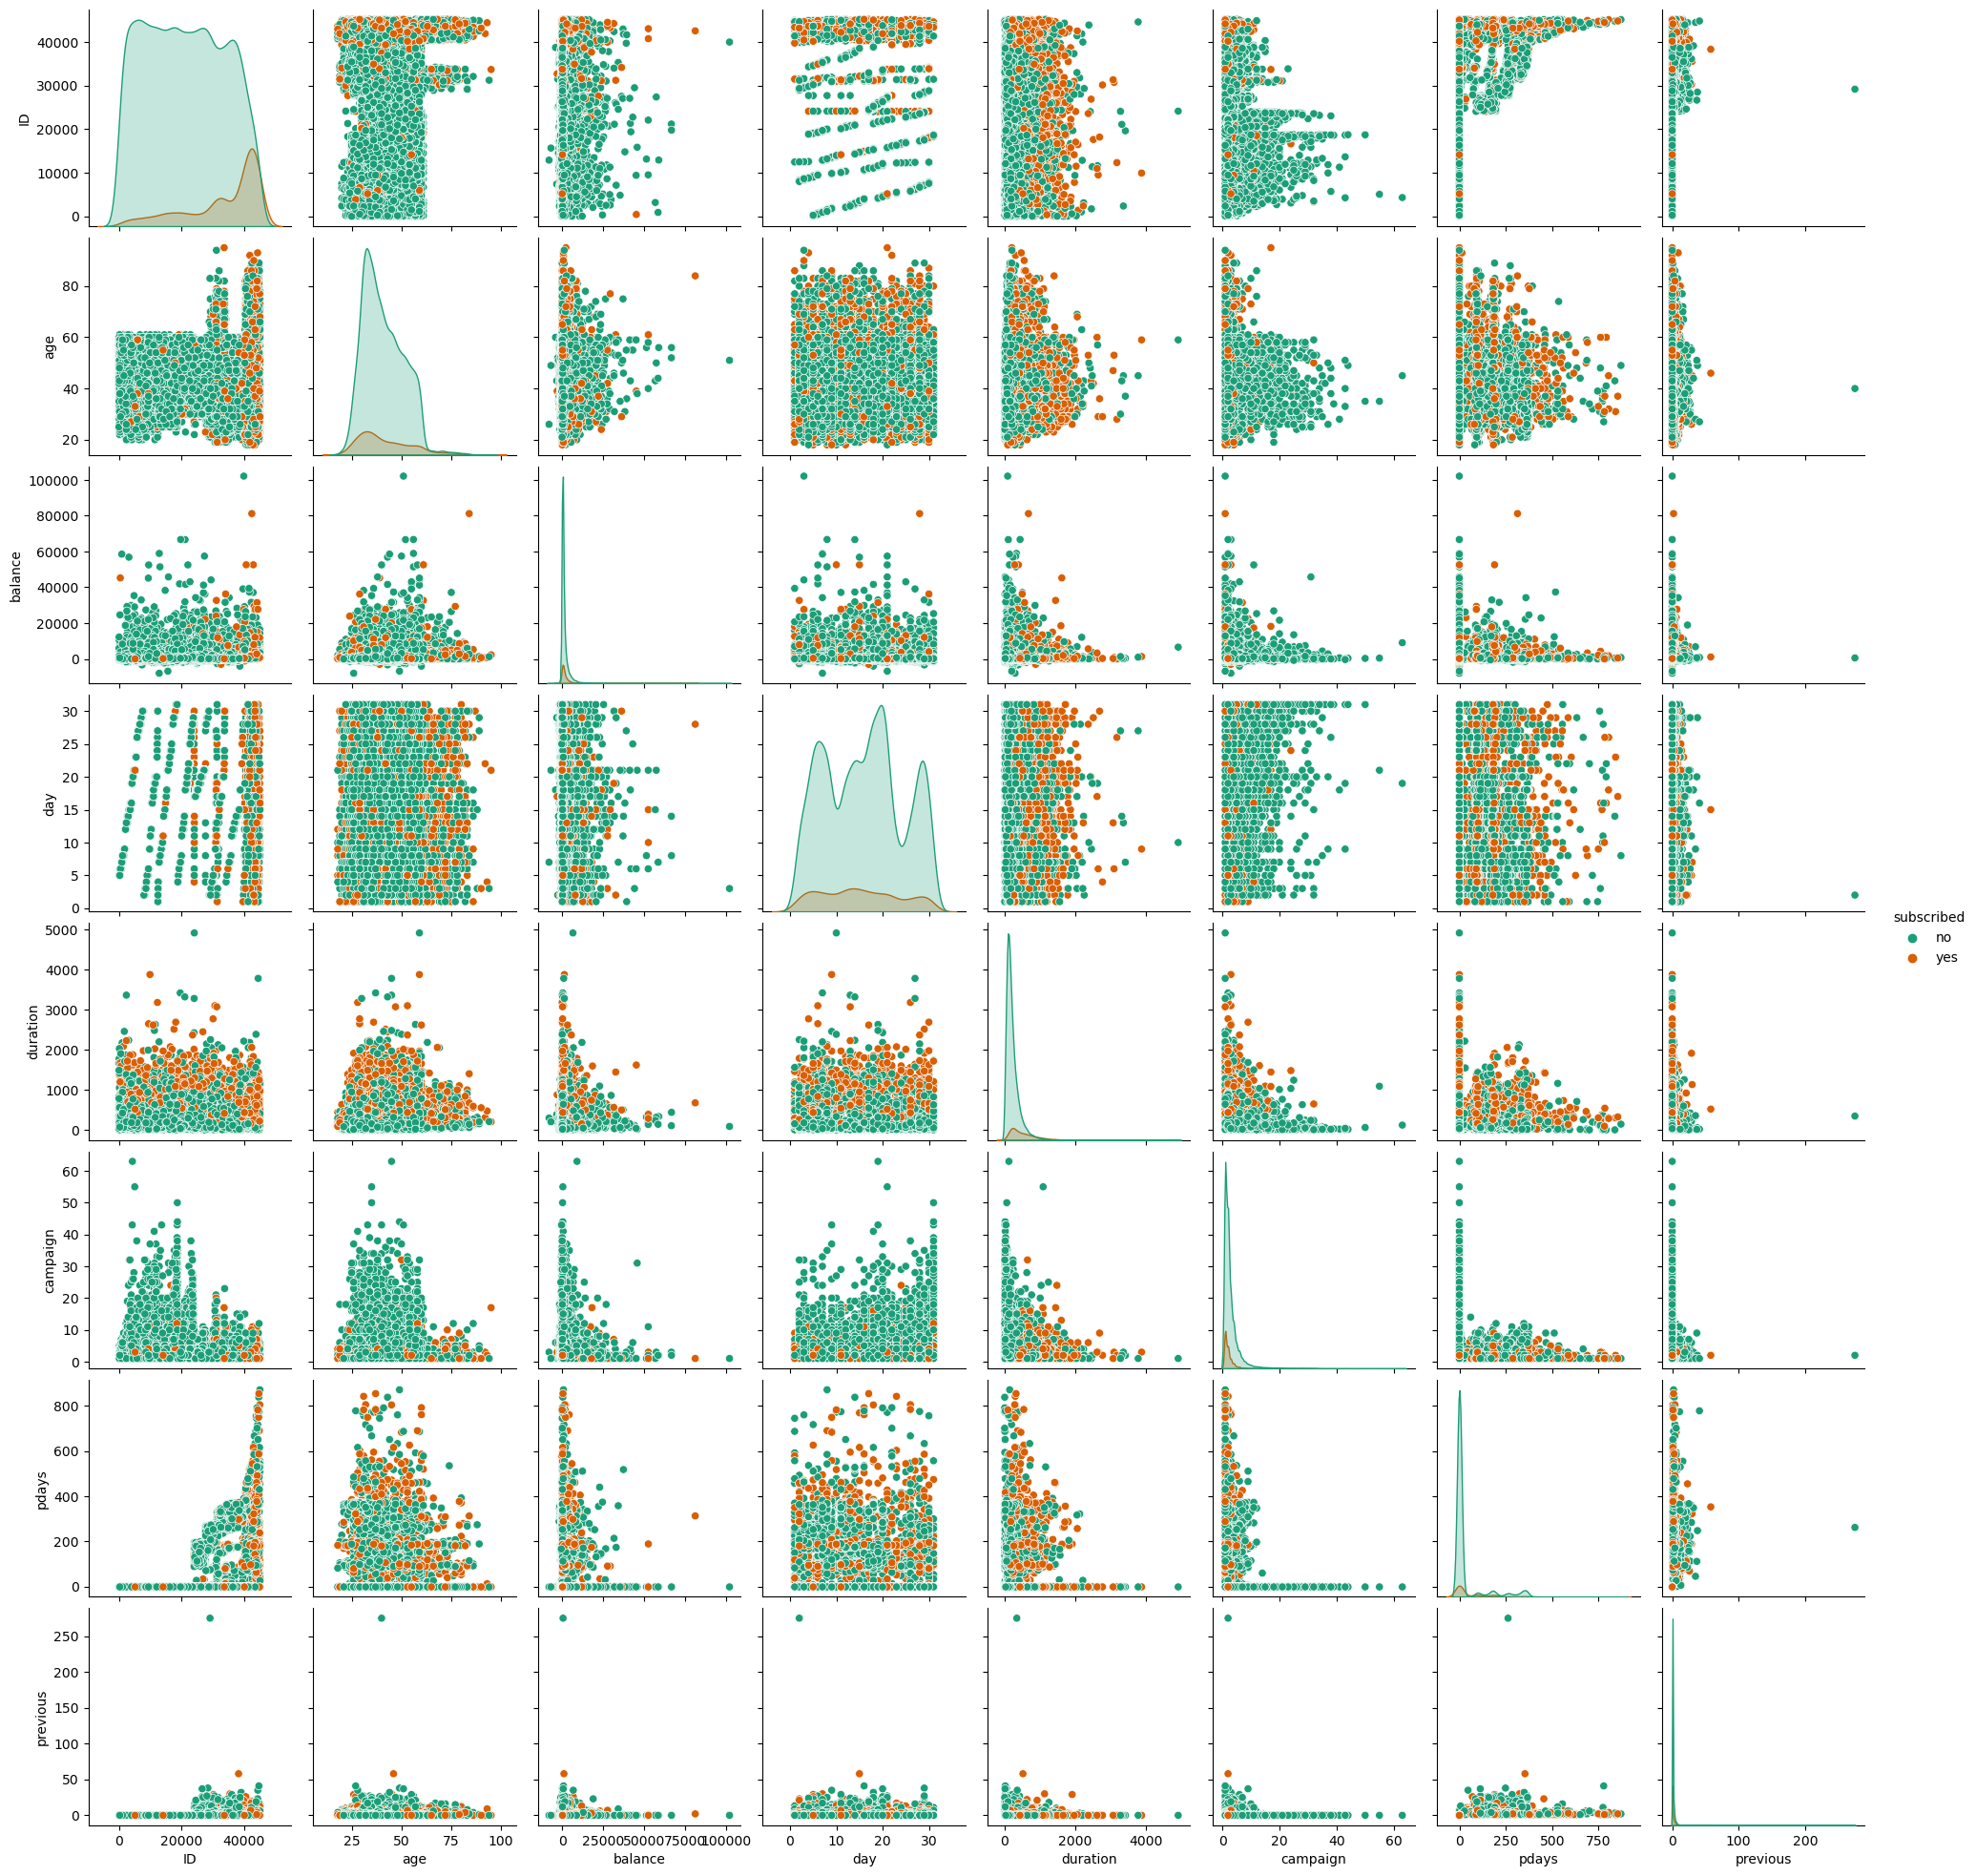

In [39]:
sns.pairplot(df,hue = "subscribed",palette="Dark2")
plt.show()

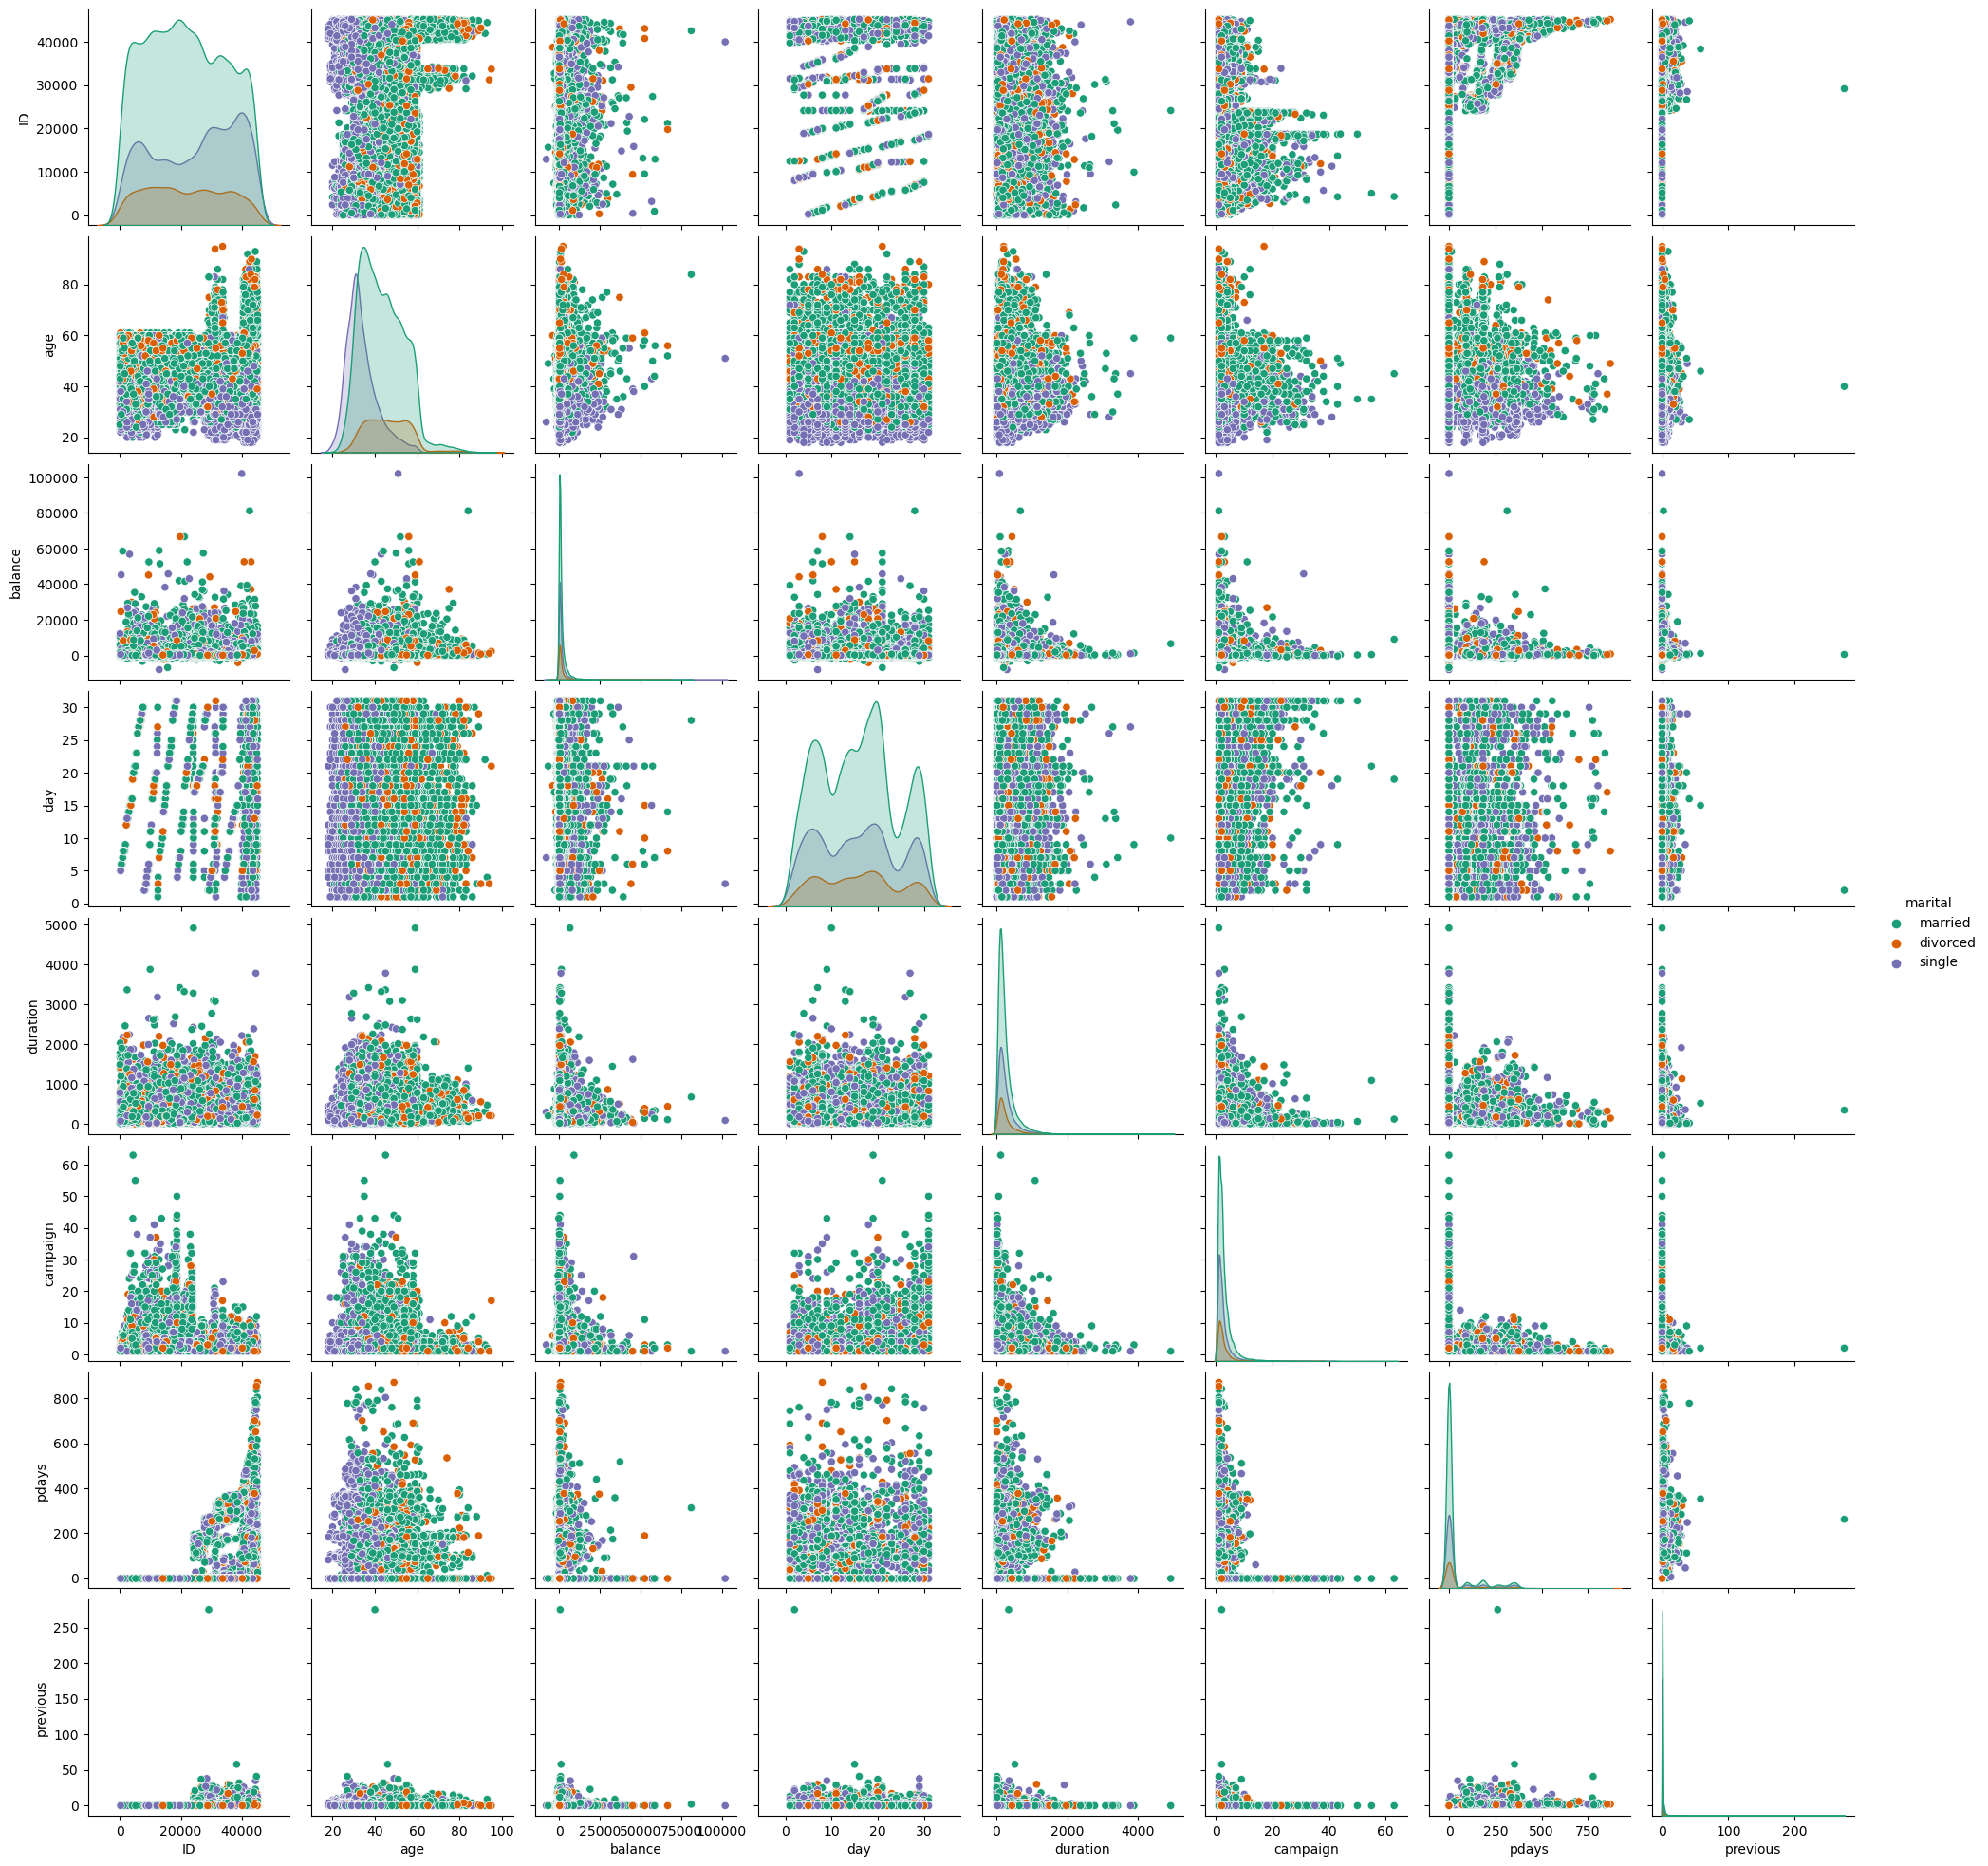

In [40]:
sns.pairplot(df,hue = "marital",palette="Dark2")
plt.show()

# Now Checking the outliers

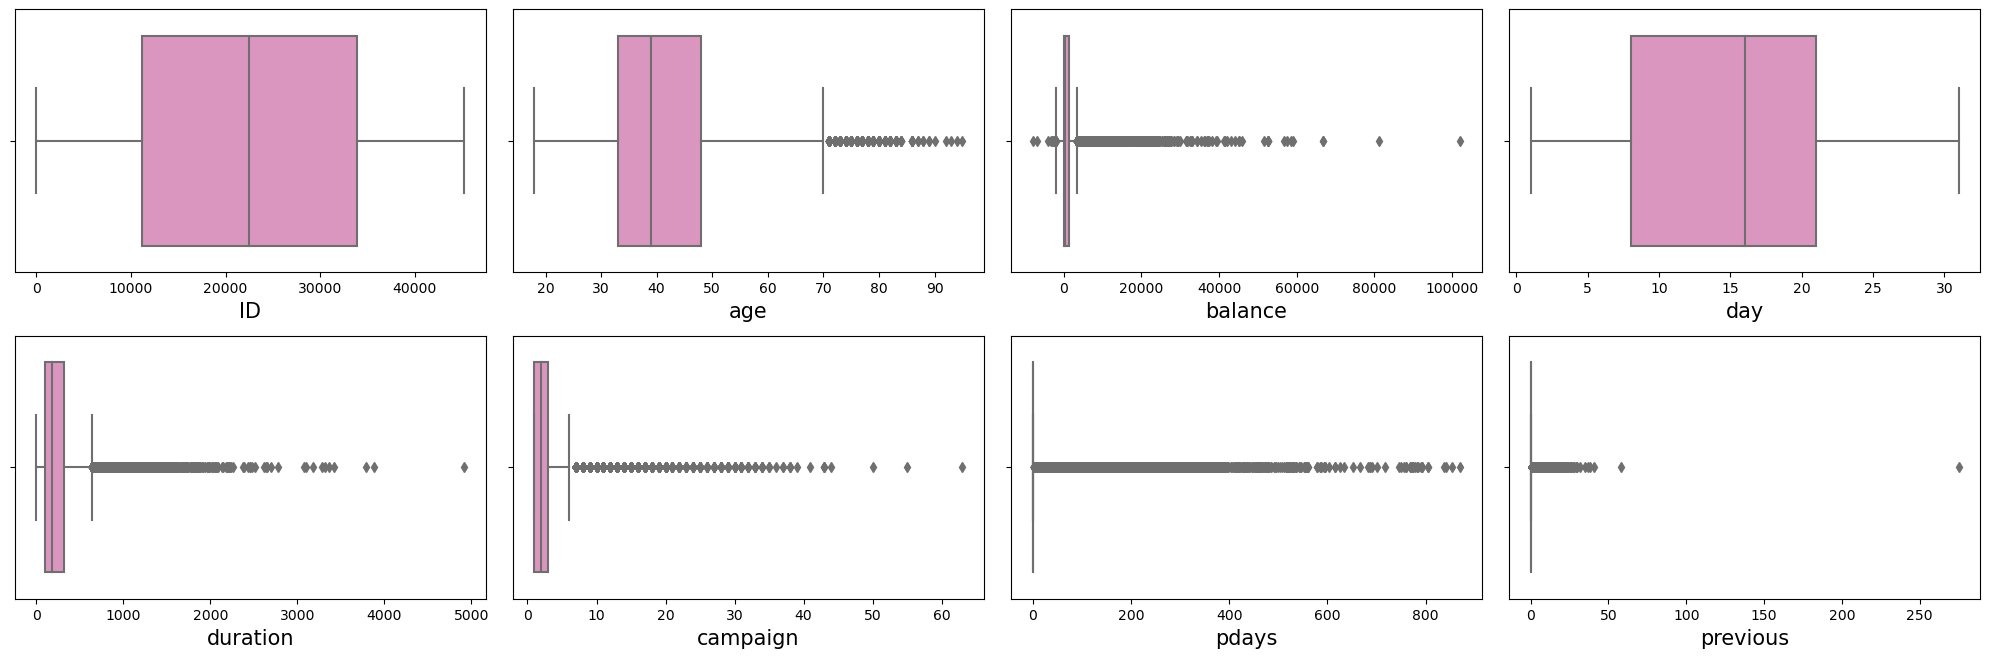

In [41]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

Almost all of the columns contains outliers so we removed outliers using iQR method

In [42]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['ID', 'age','balance','day', 'duration', 'campaign']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
          ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
4      29842   31  technician   married  secondary      no      119     yes   
5      29390   33  management    single   tertiary      no        0     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31640  12109   43  management    single  secondary      no     2968      no   
31641   9476   37  technician    single   tertiary      no     1309      no   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   

      loan    co

when using the IQR method the at now the outliers removed

# Ordinal Encoder

In [43]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize Ordinal Encoder
OE = OrdinalEncoder()

mappings = {}

# Encoding categorical columns
for col in df1.columns:
    if df1[col].dtype == "object":
        original_values = df1[col].unique()
        df1[col] = OE.fit_transform(df1[[col]])
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten()
        mappings[col] = dict(zip(original_values, encoded_values))

print("Encoded DataFrame:\n", df1)
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping:", mapping)

Encoded DataFrame:
           ID  age   job  marital  education  default  balance  housing  loan  \
0      26110   56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1      40576   31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2      15320   27   7.0      1.0        1.0      0.0      891      1.0   0.0   
4      29842   31   9.0      1.0        1.0      0.0      119      1.0   0.0   
5      29390   33   4.0      2.0        2.0      0.0        0      1.0   0.0   
...      ...  ...   ...      ...        ...      ...      ...      ...   ...   
31640  12109   43   4.0      2.0        1.0      0.0     2968      0.0   0.0   
31641   9476   37   9.0      2.0        2.0      0.0     1309      0.0   0.0   
31642  36483   29   4.0      2.0        2.0      0.0        0      1.0   0.0   
31643  40178   53   4.0      0.0        2.0      0.0      380      0.0   1.0   
31644  19710   32   4.0      2.0        2.0      0.0      312      0.0   0.0   

       contact  day

# Cheking how the data is distributed in each columns

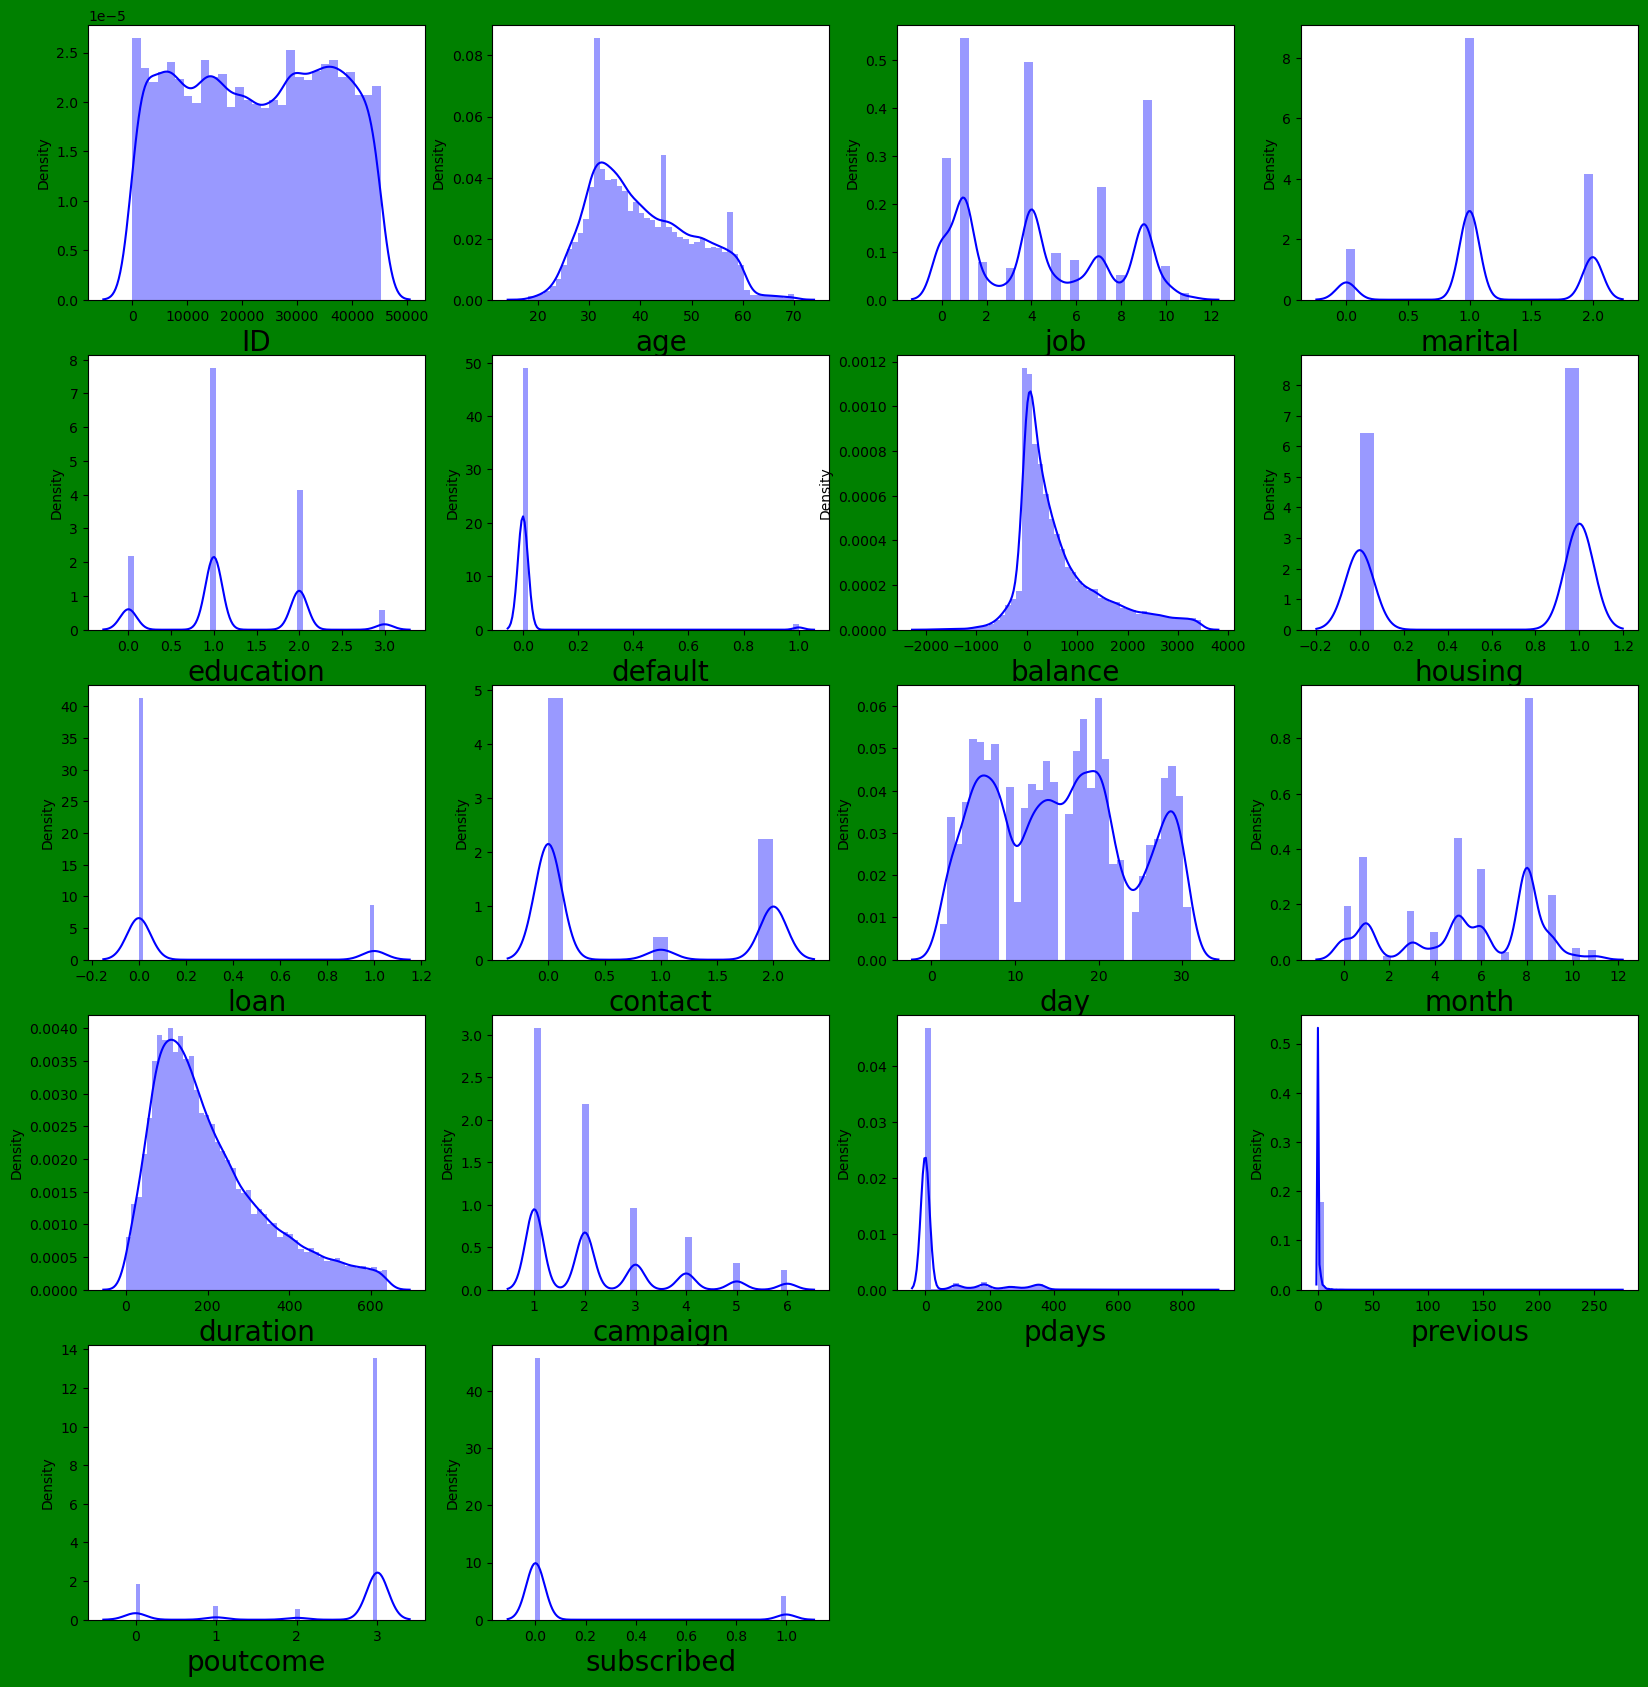

In [44]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df1:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Checking for skewness

In [45]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

ID            -0.008962
age            0.432004
job            0.269917
marital       -0.112232
education      0.229401
default        6.916508
balance        1.306415
housing       -0.288184
loan           1.728621
contact        0.745386
day            0.138223
month         -0.520196
duration       1.018532
campaign       1.223751
pdays          2.578618
previous      53.756181
poutcome      -1.928282
subscribed     2.986636
dtype: float64

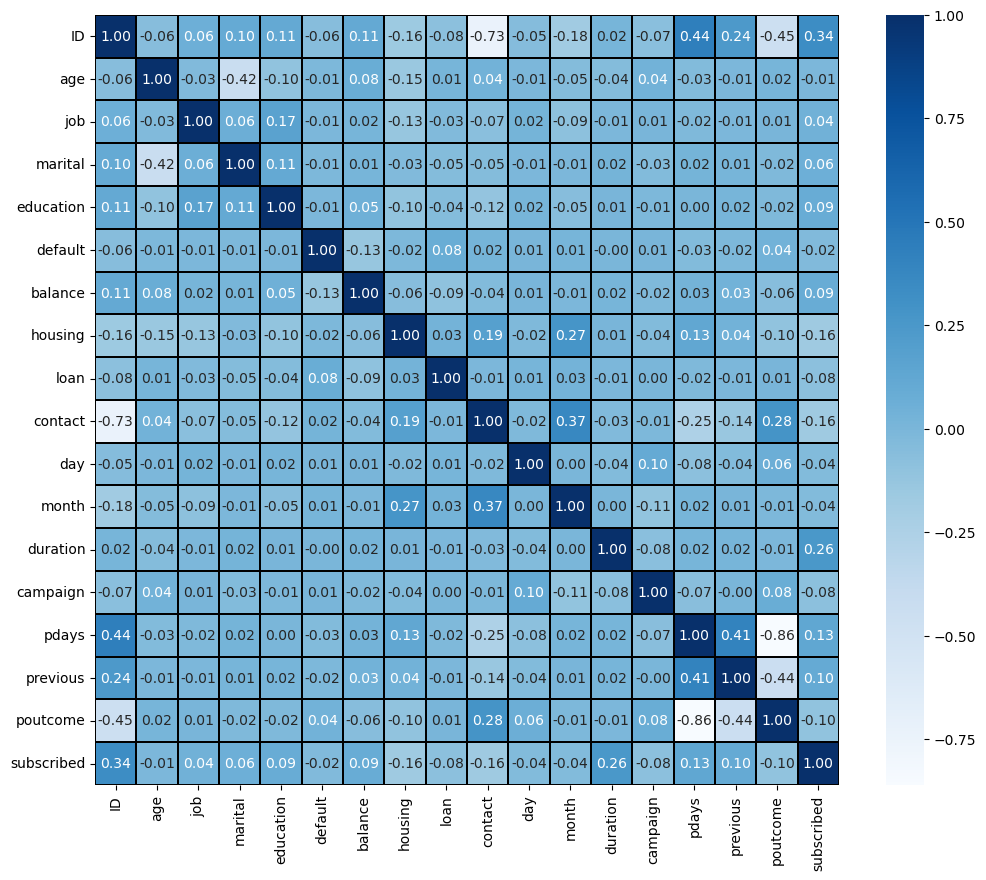

In [46]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f')       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


whe  using  heatmap then we see the ID columns and duration columns contains more skewnes

In [47]:
# Removing Skewnees using cuberoot method
df['duration'] = np.cbrt(df['duration'])

But in ID columns these columns contains unique values

In [48]:
df1.drop("ID", axis=1, inplace=True)

# Correlation between the target variable and indepnedent variable

In [49]:
# Now we will check the correlation between features using corr()
df1.corr()

age       job   marital  education   default   balance  \
age         1.000000 -0.025855 -0.417057  -0.097979 -0.011079  0.081063   
job        -0.025855  1.000000  0.064284   0.169093 -0.006073  0.015083   
marital    -0.417057  0.064284  1.000000   0.106830 -0.011395  0.013371   
education  -0.097979  0.169093  0.106830   1.000000 -0.008424  0.052769   
default    -0.011079 -0.006073 -0.011395  -0.008424  1.000000 -0.132257   
balance     0.081063  0.015083  0.013371   0.052769 -0.132257  1.000000   
housing    -0.147377 -0.128106 -0.025048  -0.104590 -0.017127 -0.059727   
loan        0.013840 -0.031115 -0.045673  -0.040639  0.078276 -0.091724   
contact     0.039181 -0.074662 -0.046153  -0.118685  0.020724 -0.038603   
day        -0.008070  0.019371 -0.006816   0.017114  0.009270  0.006855   
month      -0.045997 -0.085669 -0.005325  -0.054029  0.014461 -0.009050   
duration   -0.041498 -0.006995  0.022255   0.006086 -0.002470  0.018385   
campaign    0.038719  0.010257 -0.034928  -0.014015  0.008219 -0.024422   
pdays      -0.032526 -0.023711  0.023542   0.002187 -0.032989  0.031628   
previous   -0.006781 -0.005526  0.014947   0.018916 -0.015381  0.034945   
poutcome    0.018860  0.009265 -0.022890  -0.024148  0.037389 -0.057110   
subscribed -0.009590  0.044746  0.056899   0.087857 -0.024987  0.089461   

             housing      loan   contact       day     month  duration  \
age        -0.147377  0.013840  0.039181 -0.008070 -0.045997 -0.041498   
job        -0.128106 -0.031115 -0.074662  0.019371 -0.085669 -0.006995   
marital    -0.025048 -0.045673 -0.046153 -0.006816 -0.005325  0.022255   
education  -0.104590 -0.040639 -0.118685  0.017114 -0.054029  0.006086   
default    -0.017127  0.078276  0.020724  0.009270  0.014461 -0.002470   
balance    -0.059727 -0.091724 -0.038603  0.006855 -0.009050  0.018385   
housing     1.000000  0.029114  0.191934 -0.023208  0.274543  0.005400   
loan        0.029114  1.000000 -0.008021  0.013133  0.026398 -0.008287   
contact     0.191934 -0.008021  1.000000 -0.018412  0.374954 -0.028672   
day        -0.023208  0.013133 -0.018412  1.000000  0.003115 -0.038543   
month       0.274543  0.026398  0.374954  0.003115  1.000000  0.003144   
duration    0.005400 -0.008287 -0.028672 -0.038543  0.003144  1.000000   
campaign   -0.035042  0.002367 -0.013605  0.103718 -0.111475 -0.075404   
pdays       0.125593 -0.021099 -0.252989 -0.075617  0.017494  0.017262   
previous    0.037904 -0.006782 -0.138808 -0.038467  0.010500  0.015924   
poutcome   -0.098238  0.010115  0.282907  0.063074 -0.012977 -0.005936   
subscribed -0.163747 -0.082426 -0.163257 -0.035026 -0.035958  0.258259   

            campaign     pdays  previous  poutcome  subscribed  
age         0.038719 -0.032526 -0.006781  0.018860   -0.009590  
job         0.010257 -0.023711 -0.005526  0.009265    0.044746  
marital    -0.034928  0.023542  0.014947 -0.022890    0.056899  
education  -0.014015  0.002187  0.018916 -0.024148    0.087857  
default     0.008219 -0.032989 -0.015381  0.037389   -0.024987  
balance    -0.024422  0.031628  0.034945 -0.057110    0.089461  
housing    -0.035042  0.125593  0.037904 -0.098238   -0.163747  
loan        0.002367 -0.021099 -0.006782  0.010115   -0.082426  
contact    -0.013605 -0.252989 -0.138808  0.282907   -0.163257  
day         0.103718 -0.075617 -0.038467  0.063074   -0.035026  
month      -0.111475  0.017494  0.010500 -0.012977   -0.035958  
duration   -0.075404  0.017262  0.015924 -0.005936    0.258259  
campaign    1.000000 -0.065388 -0.000936  0.080686   -0.081021  
pdays      -0.065388  1.000000  0.407935 -0.860201    0.130401  
previous   -0.000936  0.407935  1.000000 -0.438896    0.103072  
poutcome    0.080686 -0.860201 -0.438896  1.000000   -0.103444  
subscribed -0.081021  0.130401  0.103072 -0.103444    1.000000

In [50]:
df1.corr().subscribed.sort_values()

housing      -0.163747
contact      -0.163257
poutcome     -0.103444
loan         -0.082426
campaign     -0.081021
month        -0.035958
day          -0.035026
default      -0.024987
age          -0.009590
job           0.044746
marital       0.056899
education     0.087857
balance       0.089461
previous      0.103072
pdays         0.130401
duration      0.258259
subscribed    1.000000
Name: subscribed, dtype: float64

# Split the target features

In [51]:
# Separating the independent and target varaible into x and y
x = df1.drop(['subscribed'], axis=1)  # Features we remove subscribed columns
y = df1['subscribed']    #  Here now the price is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (24339, 16)
Label Dimensions (24339,)


In [52]:
y.value_counts()

0.0    22281
1.0     2058
Name: subscribed, dtype: int64

Here we can see that the data is not balanced

In [53]:
# Oversampling used to balance the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [54]:
y1.value_counts()

0.0    22281
1.0    22281
Name: subscribed, dtype: int64

Now we can see that the data is balanced

# Find the best model

In [55]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Find the accuracy and random state

In [56]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestClassifier
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = RFR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

In [57]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.967387239135313 at random_state 17


# Creating the train test split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30,random_state=maxRS)

# Random Forest Classifier

In [59]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.9668636397636323
Confusion Matrix:
[[6481  177]
 [ 266 6445]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      6658
         1.0       0.97      0.96      0.97      6711

    accuracy                           0.97     13369
   macro avg       0.97      0.97      0.97     13369
weighted avg       0.97      0.97      0.97     13369



# Support Vector Machine Classifier

In [60]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_svc)
print("Classification Report:")
print(report)

Accuracy: 0.7296731243922507
Confusion Matrix:
[[4575 2083]
 [1531 5180]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      6658
         1.0       0.71      0.77      0.74      6711

    accuracy                           0.73     13369
   macro avg       0.73      0.73      0.73     13369
weighted avg       0.73      0.73      0.73     13369



# GradientBoostingClassifier

In [61]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_gb=GB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_gb)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_gb)
print("Classification Report:")
print(report)

Accuracy: 0.9540728551125739
Confusion Matrix:
[[6416  242]
 [ 372 6339]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      6658
         1.0       0.96      0.94      0.95      6711

    accuracy                           0.95     13369
   macro avg       0.95      0.95      0.95     13369
weighted avg       0.95      0.95      0.95     13369



# AdaBoostClassifier

In [62]:
# Checking accuracy for AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pred_ab=AB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ab)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ab)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ab)
print("Classification Report:")
print(report)

Accuracy: 0.9409080709103149
Confusion Matrix:
[[6302  356]
 [ 434 6277]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      6658
         1.0       0.95      0.94      0.94      6711

    accuracy                           0.94     13369
   macro avg       0.94      0.94      0.94     13369
weighted avg       0.94      0.94      0.94     13369



# Bagging Classifier

In [63]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
pred_bc=BC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_bc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_bc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_bc)
print("Classification Report:")
print(report)

Accuracy: 0.9561672525992969
Confusion Matrix:
[[6445  213]
 [ 373 6338]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      6658
         1.0       0.97      0.94      0.96      6711

    accuracy                           0.96     13369
   macro avg       0.96      0.96      0.96     13369
weighted avg       0.96      0.96      0.96     13369



# Extra Trees Classifier

In [64]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 0.9682848380581943
Confusion Matrix:
[[6418  240]
 [ 184 6527]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      6658
         1.0       0.96      0.97      0.97      6711

    accuracy                           0.97     13369
   macro avg       0.97      0.97      0.97     13369
weighted avg       0.97      0.97      0.97     13369



# Hyper parameter Tunings

In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter 
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],
              'max_depth': [0,10,20],
              'n_jobs':[-2,-1,1],
              'n_estimators' : [50,100,200,300]} 

In [66]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [68]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [76]:
Model = ExtraTreesClassifier ( criterion = "gini" , max_depth = 20,n_jobs = -2,random_state = 1000,n_estimators = 200)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

95.6316852419777


# Saving the model using joblib

In [77]:
# Saving the model
import joblib
joblib.dump(Model,"customer_subscription.pkl")

['customer_subscription.pkl']

In [78]:
import pickle
filename = "customer_subscription.pkl"
pickle.dump(Model, open(filename,'wb'))  #Saved model

# Predicting the saved model

In [79]:
load_model = pickle.load(open("customer_subscription.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

95.6316852419777


# Conclusion

In [80]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

0      1      2      3      4      5      6      7      8      \
Predicted    1.0    0.0    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
Original     1.0    0.0    1.0    1.0    0.0    0.0    0.0    1.0    1.0   

           9      ...  13359  13360  13361  13362  13363  13364  13365  13366  \
Predicted    1.0  ...    1.0    1.0    0.0    0.0    1.0    1.0    1.0    1.0   
Original     1.0  ...    1.0    1.0    0.0    0.0    1.0    1.0    1.0    1.0   

           13367  13368  
Predicted    0.0    0.0  
Original     0.0    0.0  

[2 rows x 13369 columns]

In [81]:
df1

age   job  marital  education  default  balance  housing  loan  \
0       56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1       31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2       27   7.0      1.0        1.0      0.0      891      1.0   0.0   
4       31   9.0      1.0        1.0      0.0      119      1.0   0.0   
5       33   4.0      2.0        2.0      0.0        0      1.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
31640   43   4.0      2.0        1.0      0.0     2968      0.0   0.0   
31641   37   9.0      2.0        2.0      0.0     1309      0.0   0.0   
31642   29   4.0      2.0        2.0      0.0        0      1.0   0.0   
31643   53   4.0      0.0        2.0      0.0      380      0.0   1.0   
31644   32   4.0      2.0        2.0      0.0      312      0.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  \
0          1.0   19    9.0        44         2     -1         0       3.0   
1          0.0   20    5.0        91         2     -1         0       3.0   
2          0.0   18    5.0       240         1     -1         0       3.0   
4          0.0    4    3.0       380         1     -1         0       3.0   
5          0.0    2    3.0       116         3     -1         0       3.0   
...        ...  ...    ...       ...       ...    ...       ...       ...   
31640      2.0   20    6.0        30         4     -1         0       3.0   
31641      2.0    6    6.0       442         2     -1         0       3.0   
31642      0.0   12    8.0       116         2     -1         0       3.0   
31643      0.0    5    6.0       438         2     -1         0       3.0   
31644      0.0    7    1.0        37         3     -1         0       3.0   

       subscribed  
0             0.0  
1             0.0  
2             0.0  
4             0.0  
5             0.0  
...           ...  
31640         0.0  
31641         0.0  
31642         0.0  
31643         1.0  
31644         0.0  

[24339 rows x 17 columns]

# Now we making the diagram

In [83]:
import numpy as np

# Define the mapping dictionaries
job_mapping = {'admin.': 0.0, 'unknown': 11.0, 'services': 7.0, 'technician': 9.0, 'management': 4.0, 'retired': 5.0, 'blue-collar': 1.0, 'housemaid': 3.0, 'self-employed': 6.0, 'student': 8.0, 'entrepreneur': 2.0, 'unemployed': 10.0}
marital_mapping = {'married': 1.0, 'single': 2.0, 'divorced': 0.0}
education_mapping = {'unknown': 3.0, 'secondary': 1.0, 'tertiary': 2.0, 'primary': 0.0}
default_mapping = {'no': 0.0, 'yes': 1.0}
housing_mapping = {'no': 0.0, 'yes': 1.0}
loan_mapping = {'no': 0.0, 'yes': 1.0}
contact_mapping = {'telephone': 1.0, 'cellular': 0.0, 'unknown': 2.0}
month_mapping = {'nov': 9.0, 'jul': 5.0, 'feb': 3.0, 'jun': 6.0, 'jan': 4.0, 'may': 8.0, 'aug': 1.0, 'oct': 10.0, 'mar': 7.0, 'apr': 0.0, 'dec': 2.0, 'sep': 11.0}
poutcome_mapping = {'unknown': 0.0}
subscribed_mapping = {'no': 0.0, 'yes': 1.0}

# Define the input data (subscribed characteristics)
input_data = [31, 'unknown', 'married', 'secondary', 'no', 3, 'no', 'no', 'cellular', 20, 'jul', 91, 2, -1, 0, 'unknown']

# Convert the input data to their numerical equivalents
input_data_numerical = np.array([
    input_data[0],  # Age (assuming this is numerical)
    job_mapping[input_data[1]],
    marital_mapping[input_data[2]],
    education_mapping[input_data[3]],
    default_mapping[input_data[4]],
    input_data[5],  # Assuming this is already numerical
    housing_mapping[input_data[6]],
    loan_mapping[input_data[7]],
    contact_mapping[input_data[8]],
    input_data[9],  # Assuming this is numerical (day)
    month_mapping[input_data[10]],
    input_data[11],  # Assuming this is numerical (duration)
    input_data[12],  # Assuming this is numerical (campaign)
    input_data[13],  # Assuming this is numerical (pdays)
    input_data[14],  # Assuming this is numerical (previous)
    poutcome_mapping[input_data[15]]
]).reshape(1, -1)

# Load your trained model (assuming it's already loaded as 'model')
# For demonstration, we assume 'model' is a placeholder for your actual trained model
# model = your_trained_model

# Make prediction using the trained model
prediction = load_model.predict(input_data_numerical)

# Print the input data and predicted subscription
print("Input Data (Numerical):", input_data_numerical)
print("Predicted Subscription:", prediction)

Input Data (Numerical): [[31. 11.  1.  1.  0.  3.  0.  0.  0. 20.  5. 91.  2. -1.  0.  0.]]
Predicted Subscription: [0.]


In [84]:
# Assuming 'conclusion' is the predicted subscribtion label (0, 1)
if prediction == 0:
    print("The Person does not taken subscription")
else:
    print("The Person does taken subscription")  # Handle unexpected values

The Person does not taken subscription


# Thank You